# Title : 사이킷런을 이용하여 붓꽃(Iris) 데이터 품종 예측하기

- 순서
  - 라이브러리 호출
  - 데이터세트 호출
  - *EDA (Exploratory Data Analysis)*
  - *Feature Engineering*
  - 데이터 분리
  - 모델 알고리즘 선택 및 생성, 학습
  - 학습 변수 저장
  - 학습 변수 호출
  - 모델 예측
  - *결과 분석*

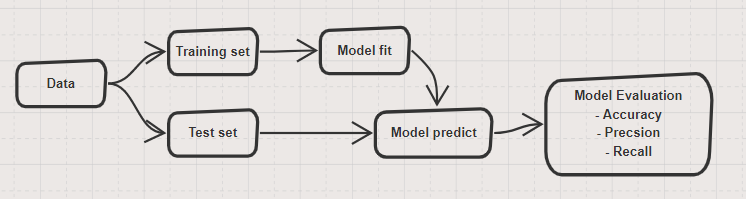

In [2]:
# 라이브러리 호출

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import CategoricalNB   #GaussianNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Dataset 호출
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()


In [4]:
# DataFrame 구성
iris_data = iris.data
print(type(iris_data))
iris_label = iris.target

print("iris target: ", iris_label)
print("iris_target name", iris.target_names)

iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)
iris_df['label'] = iris.target

iris_df.head(3)

<class 'numpy.ndarray'>
iris target:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
iris_target name ['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [5]:
# Data shape  확인

%whos

Variable           Type         Data/Info
-----------------------------------------
CategoricalNB      ABCMeta      <class 'sklearn.naive_bayes.CategoricalNB'>
GaussianNB         ABCMeta      <class 'sklearn.naive_bayes.GaussianNB'>
accuracy_score     function     <function accuracy_score at 0x7f0d92e14ea0>
iris               Bunch        {'data': array([[5.1, 3.5<...>/datasets/data/iris.csv'}
iris_data          ndarray      150x4: 600 elems, type `float64`, 4800 bytes
iris_df            DataFrame         sepal length (cm)  s<...>n\n[150 rows x 5 columns]
iris_label         ndarray      150: 150 elems, type `int64`, 1200 bytes
load_iris          function     <function load_iris at 0x7f0d91f05158>
np                 module       <module 'numpy' from '/us<...>kages/numpy/__init__.py'>
pd                 module       <module 'pandas' from '/u<...>ages/pandas/__init__.py'>
plt                module       <module 'matplotlib.pyplo<...>es/matplotlib/pyplot.py'>
sns                module     

In [6]:
#DataFramework info()
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   label              150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [7]:
#DataFramework describe()
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [8]:
#Data split
X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_label, 
                                                    test_size=0.2, random_state=4)

In [9]:
#알고리즘 생성 및 학습
#GaussianNBClassifier 생성 및 학습
clf_cnb = CategoricalNB()
clf_cnb.fit(X_train, y_train)

CategoricalNB(alpha=1.0, class_prior=None, fit_prior=True)

In [10]:
# 예측 수행
y_pred = clf_cnb.predict(X_test)
print(y_pred)

[2 0 2 2 2 1 2 0 0 2 0 0 0 1 2 0 1 0 0 1 0 2 1 0 0 0 0 0 0 1]


In [11]:
accuracy = accuracy_score(y_test, y_pred) * 100
accuracy

90.0

3


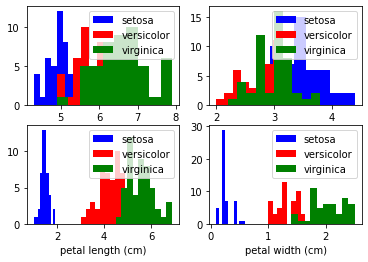

In [13]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

np.random.seed(42)

fig, axes = plt.subplots(nrows= 2, ncols=2)
colors= ['blue', 'red', 'green']

print(len(iris.target_names))

for i, ax in enumerate(axes.flat):
    for label, color in zip(range(len(iris.target_names)), colors):
        ax.hist(iris.data[iris.target==label, i], label=             
                            iris.target_names[label], color=color)
        ax.set_xlabel(iris.feature_names[i])  
        ax.legend(loc='upper right')


In [11]:
#
clf_gnb = GaussianNB()
clf_gnb.fit(X_train, y_train)
y_pred = clf_gnb.predict(X_test)
print(y_pred)

[2 0 2 2 2 1 1 0 0 1 0 0 0 1 2 0 1 0 0 2 0 2 1 0 0 0 0 0 0 2]


In [12]:
accuracy = accuracy_score(y_test, y_pred) * 100
accuracy

96.66666666666667